**Course**: [BIO-341 _Systèmes Dynamiques en Biologie](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Felix Naef_

# Limit cycle

In [1]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
from matplotlib.markers import MarkerStyle
set_matplotlib_formats('png', 'pdf')

## Phase portrait for the glycolysis oscillator

In [4]:
def phase_portrait(F, par, xdomain, ydomain, initial_conditions = None, time_domain = None):
    
    #grid for both coordinates
    x, y = np.meshgrid(xdomain, ydomain)
    
    a=par['a']
    b=par['b']

    #compute the derivatives for all points of the grid
    dx = -x + a*y + x**2*y 
    dy = b*(x**0) - a*y - x**2*y

    #normalize
    eps=1.0e-6
    temp = dx/(dx**2+dy**2+eps)**0.5 
    dy = dy/(dx**2+dy**2+eps)**0.5
    dx = temp

    #plot the vectorfield
    plt.figure(figsize = (10,10)) #initialize an empty square figure
    plt.quiver(x,y,dx,dy, color = "lightblue") #plot the vectorfield
    
    #plot the nullclines  
#     plt.plot(0*xdomain+.01, ydomain, c = 'blue', ls = '--', lw = 2, label = 'x-nullcline')
    xdom = np.linspace(0, rangex, 100)
    ydom = np.linspace(0, rangey, 100)
    
    plt.plot(xdom, xdom / (a + xdom**2), c = 'blue', ls = '--', lw = 2, label = 'x-nullcline')
    plt.plot(xdom, b / (a + xdom**2), c = 'green', ls = '--', lw = 2, label = 'x-nullcline')
    
#     #plot the eigenvectors
#     [Lambda, V] = np.linalg.eig(A)
#     v1, v2 = V[:,0], V[:,1]
#     if not abs(Lambda[0].imag)>0:
#         plt.plot(xdomain*v1[0], ydomain*v1[1], c = 'orange', ls = '-.', lw = 2, label = 'v1')
#         plt.plot(xdomain*v2[0], ydomain*v2[1], c = 'brown', ls = '-.', lw = 2, label = 'v2')

#     if initial_conditions is not None and time_domain is not None:

# plot the confinement region
#    plt.plot([0,0,b],[0,b/a,b/a], color='purple', lw=2)
    

#       plot some selected trajectories
    for x0 in initial_conditions:
        X = odeint(F, x0, time_domain, args=(a, b))
        plt.plot(X[:,0],X[:,1], color = 'red')

    #adjust figure parameters
    plt.xlim([xdomain[0]-0.1,xdomain[-1]])
    plt.ylim([ydomain[0]-0.1,ydomain[-1]])
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.title(str(Lambda[0]) + ' ' + str(Lambda[1]))
#     plt.legend()
    plt.grid()
    plt.show()

#define the time domain
time = np.linspace(0,50,1000)

#initial conditions
x0 = [(0,y0) for y0 in [0,0.5,1,1.5,2,2.5,3] ]
x0 = x0 + [(0.5,0),(1,0),(1.5,0), (0.5,1)]

# def deg_node(x0, time, eps=-0.2, range=3):
#     #define the function domain

rangex=3
rangey=3

def xdot(X, t ,a, b):
    x=X[0]
    y=X[1]
    dx = -x + a*y + x**2*y 
    dy = b*(x**0) - a*y - x**2*y
    return np.array([dx,dy])

def animate(x0, time, a=0.05, b=0.3):
    #define the function domain
    xdom = np.linspace(0, rangex, 20)
    ydom = np.linspace(0, rangey, 20)
    par={'a':a,'b':b}
    phase_portrait(xdot, par, xdom, ydom, x0, time)

interact(animate, x0=fixed(x0), time=fixed(time), a = (0,0.2,0.01), b = (0,1.5,0.1))

# interact(deg_node, x0=fixed(x0_conditions), time=fixed(time_domain), eps = (-0.5,0.5,0.01), range=(1,10))


interactive(children=(FloatSlider(value=0.05, description='a', max=0.2, step=0.01), FloatSlider(value=0.3, des…

<function __main__.animate(x0, time, a=0.05, b=0.3)>

# Bifurcation diagram

This represents the type of fixed point in function of $a$ and $b^2$.

In [3]:
def tau(a,b2):
    return -(b2**2 + (2*a-1)*b2 +(a**2+a)) / (b2+a) 

def discr(a,b2):
    return tau(a,b2)**2 - 4*(b2+a)


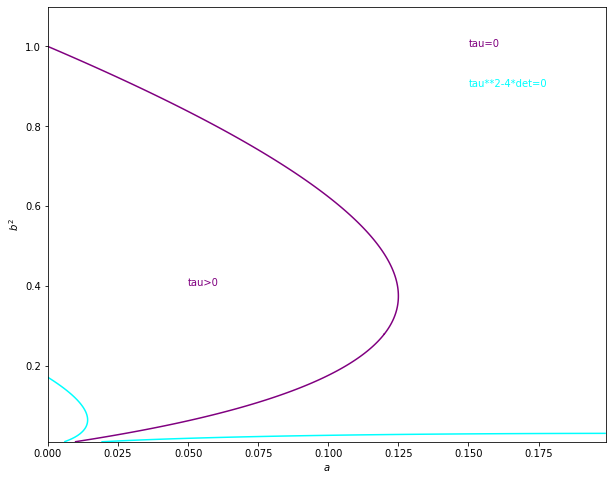

In [8]:
a=np.arange(0,0.2,0.001)
b2=np.arange(0.01,1.1,0.001)
aa,bb=np.meshgrid(a,b2)
val=np.array([0.])
Tau=np.zeros_like(aa)
D=np.zeros_like(aa)
for i in range(aa.shape[0]):
    for j in range(bb.shape[1]):
        Tau[i,j]=tau(aa[i,j],bb[i,j])
        D[i,j]=discr(aa[i,j],bb[i,j])

#That's the trick: countour plots
plt.figure(figsize=(10,8))
plt.contour(aa,bb,Tau,val, colors='purple')
plt.contour(aa,bb,D,val, colors='cyan')

plt.xlabel('$a$')
plt.ylabel('$b^2$')

plt.annotate('tau>0',(0.05,0.4), color='purple')
plt.annotate('tau=0',(0.15,1), color='purple')
plt.annotate('tau**2-4*det=0',(0.15,0.9), color='cyan')

plt.show()